In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/SleepStudy.csv')
df=pd.read_csv('SleepStudy.csv')
print(df.columns)
#df.to_csv('SleepStudy.csv')
encoder = preprocessing.LabelEncoder()
#df['Target']=df['DepressionStatus']
df['Target']=encoder.fit_transform(df['DepressionStatus'])
df['LarkOwl_enc']=encoder.fit_transform(df['LarkOwl'])
df['AlcoholUse_enc']=encoder.fit_transform(df['AlcoholUse'])
df['DepressionStatus_enc']=encoder.fit_transform(df['DepressionStatus'])
df['AnxietyStatus_enc']=encoder.fit_transform(df['AnxietyStatus'])
df['Stress_enc']=encoder.fit_transform(df['Stress'])
NUMERIC=['Gender',  
       'DepressionScore',   
         'Stress_enc',
        'DASScore', 'Happiness', 
       'WeekendSleep']


X=df[NUMERIC]
#y=df['Target'].apply(lambda x: 1 if ((x=='moderate') | (x=='severe')) else 0)
y=pd.get_dummies(df['Target'])

#y=df['Target'].apply(lambda x:print(x))
#print(y.unique())
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

Index(['Unnamed: 0', 'Gender', 'ClassYear', 'LarkOwl', 'NumEarlyClass',
       'EarlyClass', 'GPA', 'ClassesMissed', 'CognitionZscore',
       'PoorSleepQuality', 'DepressionScore', 'AnxietyScore', 'StressScore',
       'DepressionStatus', 'AnxietyStatus', 'Stress', 'DASScore', 'Happiness',
       'AlcoholUse', 'Drinks', 'WeekdayBed', 'WeekdayRise', 'WeekdaySleep',
       'WeekendBed', 'WeekendRise', 'WeekendSleep', 'AverageSleep',
       'AllNighter'],
      dtype='object')


In [3]:
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
    #('clf',MultiOutputRegressor(DecisionTreeRegressor()))
    ('clf',MultiOutputRegressor(LogisticRegression(max_iter=1000,C=5)))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('clf',
                 MultiOutputRegressor(estimator=LogisticRegression(C=5,
                                                                   max_iter=1000)))])

In [4]:

model_clf=pipeline['clf']
model_clf.fit(X_train,y_train)
#print(log_reg_clf.coef_)

predictions=model_clf.predict(X_test)
#print("Accuracy={}, Precision={}, Recall={}".format(accuracy_score(y_test, predictions),precision_score(y_test, predictions),recall_score(y_test, predictions)))

print("Accuracy",accuracy_score(y_test, predictions))    
#print(predictions)
#original_variables=list(X_train.columns)

#zipped_together=list(zip(original_variables,model_clf.coef_[0]))
#coefs = [list(x) for x in zipped_together]

#coefs=pd.DataFrame(coefs, columns=['Variable','Coefficient'])


#coefs.sort_values(by=['Coefficient'], axis=0, inplace=True, ascending=False)

#print(coefs)


Accuracy 0.9230769230769231


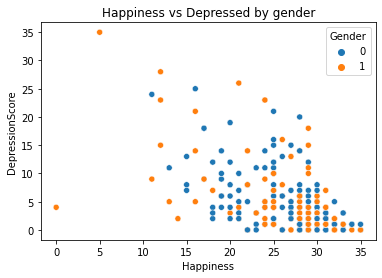

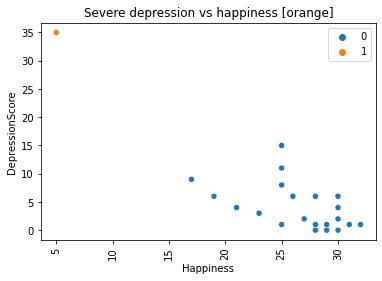

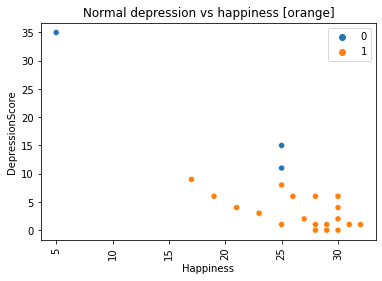

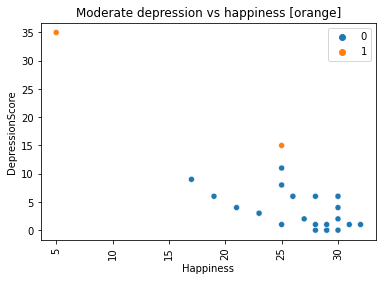

In [9]:
sns.scatterplot(x='Happiness',y='DepressionScore',hue='Gender', data=df)
plt.title("Happiness vs Depressed by gender")
plt.show()

pred_severe=predictions[:][:,2] #severe
pred_normal=predictions[:][:,1] #normal
pred_moderate=predictions[:][:,0] #moderate

sns.scatterplot(x=X_test['Happiness'],y=X_test['DepressionScore'],hue=pred_severe)
plt.title('Severe depression vs happiness [orange]')
plt.xticks(rotation=90)
plt.show()
sns.scatterplot(x=X_test['Happiness'],y=X_test['DepressionScore'],hue=pred_normal)
plt.title('Normal depression vs happiness [orange]')
plt.xticks(rotation=90)
plt.show()
sns.scatterplot(x=X_test['Happiness'],y=X_test['DepressionScore'],hue=pred_moderate)
plt.title('Moderate depression vs happiness [orange]')
plt.xticks(rotation=90)
plt.show()

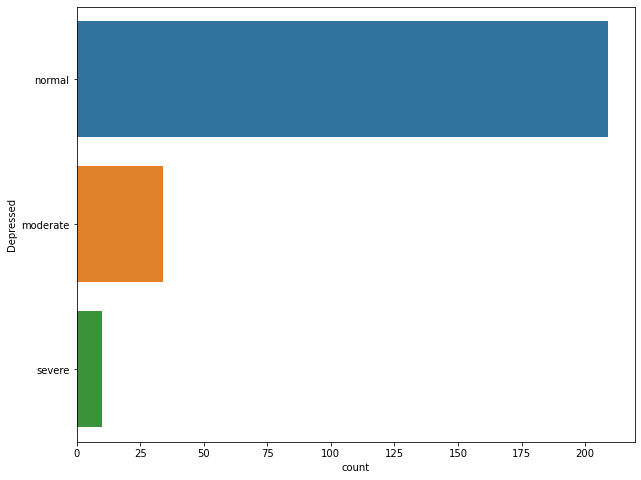

In [6]:
plt.figure(figsize=(10,8))
X2=pd.DataFrame()
#X2['Target']=df['Target'].apply(lambda x: 1 if ((x=='moderate') | (x=='severe')) else 0)
X2['Target']=df['DepressionStatus']
sns.countplot(data=X2, y="Target")
plt.ylabel("Depressed")
plt.show()

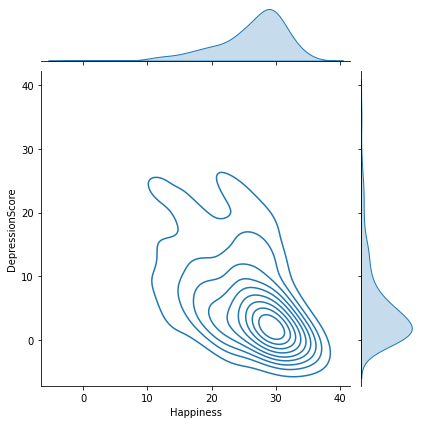

In [7]:
g=sns.JointGrid(data=X, x='Happiness', y='DepressionScore')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
#g=g.annotate(stats.pearson_r)

In [11]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
model_mae = mae(y_test, predictions)
print("error",model_mae)

error 0    9.846154
1    0.000000
2    0.000000
dtype: float64
